In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

In [72]:
#read the dataset
data = pd.read_csv("actions2load.csv")
#print the dataset
data.head(10)

account_id               event_time  \
0  608aa5969cef2edc29cb0c46deaec9da  2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506  2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5  2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506  2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c  2019-11-29 12:11:58.253   
5  eaecfa7b11e62308832d07ac94dcda6a  2019-11-29 12:12:00.402   
6  eb19e0af88f04dd5cd33bc7ae13cb85f   2019-11-29 12:12:11.34   
7  d07263602248aa70ce1967d6f98f9506  2019-11-29 12:12:58.254   
8  eaecfa7b11e62308832d07ac94dcda6a  2019-11-29 12:13:00.492   
9  b7d5902d66127909d0f9d766a841ebb5  2019-11-29 12:13:39.742   

                     event_type  product_id  \
0   DashboardLivebookLinkOpened        1156   
1              ReadingOwnedBook         610   
2              ReadingOwnedBook        1172   
3  ProductTocLivebookLinkOpened        1066   
4              ReadingOwnedBook        1073   
5              ReadingOwnedBook         887   
6              ReadingOwnedBook        1045   
7  ProductTocLivebookLinkOpened        1066   
8              ReadingOwnedBook         887   
9              ReadingOwnedBook        1172   

                              additional_data  
0  /book/learn-dbatools-in-a-month-of-lunches  
1                                         60s  
2                                        480s  
3   /book/grokking-machine-learning/chapter-1  
4                                        960s  
5                                         60s  
6                                        240s  
7   /book/grokking-machine-learning/chapter-2  
8                                        120s  
9                                        600s

In [73]:
#To get the shape of the data
#the data has 3242076 rows and 5 columns
data.shape

(3242076, 5)

In [74]:
#geting the unique values of each columns
data.nunique()

account_id           89467
event_time         2940583
event_type              35
product_id             740
additional_data     248390
dtype: int64

In [75]:
#checking the data types of each column
data.dtypes

account_id         object
event_time         object
event_type         object
product_id          int64
additional_data    object
dtype: object

In [76]:
#checking the most and least occuring events
data['event_type'].value_counts()

ReadingOwnedBook                       748260
FirstLivebookAccess                    658226
FirstManningAccess                     657340
EBookDownloaded                        277356
ReadingFreePreview                     138197
HighlightCreated                       121643
FreeContentCheckout                    116183
ReadingOpenChapter                     100004
ProductTocLivebookLinkOpened            88130
LivebookLogin                           62484
DashboardLivebookLinkOpened             48308
WishlistItemAdded                       37609
CrossReferenceTermOpened                34094
SearchMade                              27861
SearchResultOpened                      24228
ProductLookInsideLivebookLinkOpened     22987
BookmarkCreated                         10900
EBookRegistration                        8842
LivebookRegistration                     7702
LivebookAccountConfirmation              7309
ExerciseSolved                           6971
OrderConfirmationLivebookLinkOpene

In [77]:
#checking account id with the most and least event occurence
#the account Id with the most event occurence is 6bb61e3b7bce0931da574d19d1d82c88 with the total number of 1371593 events 
#while many accounts have the least event occurence of 1 each as seen below
data['account_id'].value_counts()

6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [78]:
#converting event_time variable from object to data_time data type in pandas
data["event_time"] = pd.to_datetime(data["event_time"])

In [79]:
#viewing the data type after convertion was made
data.dtypes

account_id                 object
event_time         datetime64[ns]
event_type                 object
product_id                  int64
additional_data            object
dtype: object

In [80]:
#creating an event_year column from event_time
data['event_year']= data['event_time'].dt.year

In [81]:
#creating an event_month column from event_time
data['event_month']= data['event_time'].dt.month_name(locale="English")

In [82]:
#event_date_in_the_month column . The particular date the event occured in the month
data['date_in_the_month']= data['event_time'].dt.day

In [83]:
#event_day column . The particular day of the week the event occured 
data['event_day']= data['event_time'].dt.day_name()

In [84]:
#event_day column . The particular hour of the day the event occured in the month
data['event_hour']= data['event_time'].dt.hour


In [85]:
#event_time_of_the_day. shows actual time the event occured
data['event_time_of_the_day'] = data['event_time'].dt.time

In [86]:
data.head()

account_id              event_time  \
0  608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   

                     event_type  product_id  \
0   DashboardLivebookLinkOpened        1156   
1              ReadingOwnedBook         610   
2              ReadingOwnedBook        1172   
3  ProductTocLivebookLinkOpened        1066   
4              ReadingOwnedBook        1073   

                              additional_data  event_year event_month  \
0  /book/learn-dbatools-in-a-month-of-lunches        2019    November   
1                                         60s        2019    November   
2                                        480s        2019    November   
3   /book/grokking-machine-learning/chapter-1        2019    November   
4                                        960s        2019    November   

   date_in_the_month event_day  event_hour event_time_of_the_day  
0                 29    Friday          12       12:10:08.154000  
1                 29    Friday          12       12:10:19.962000  
2                 29    Friday          12       12:11:20.707000  
3                 29    Friday          12       12:11:41.283000  
4                 29    Friday          12       12:11:58.253000

In [87]:
#defining time periods function
def TimePeriod(hour):
    if 0 < hour < 6:
        period = "Early hours"
    elif 5 < hour <12 :
        period = "Morning"
    elif 11  < hour < 17:
        period= "Afternoon"
    elif 16 < hour <20:
        period = "Evening"
    else:
        period = "Night"
    return period


In [88]:
#defining the period of day  the event occured.
# period of day will display if event occured in the morning, afternoon or night
data['period_of_day'] = data['event_hour'].apply(TimePeriod)


In [89]:
data.head()

account_id              event_time  \
0  608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2  b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3  d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4  89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   

                     event_type  product_id  \
0   DashboardLivebookLinkOpened        1156   
1              ReadingOwnedBook         610   
2              ReadingOwnedBook        1172   
3  ProductTocLivebookLinkOpened        1066   
4              ReadingOwnedBook        1073   

                              additional_data  event_year event_month  \
0  /book/learn-dbatools-in-a-month-of-lunches        2019    November   
1                                         60s        2019    November   
2                                        480s        2019    November   
3   /book/grokking-machine-learning/chapter-1        2019    November   
4                                        960s        2019    November   

   date_in_the_month event_day  event_hour event_time_of_the_day period_of_day  
0                 29    Friday          12       12:10:08.154000     Afternoon  
1                 29    Friday          12       12:10:19.962000     Afternoon  
2                 29    Friday          12       12:11:20.707000     Afternoon  
3                 29    Friday          12       12:11:41.283000     Afternoon  
4                 29    Friday          12       12:11:58.253000     Afternoon

In [90]:
#To view the total number of unique values in each variable(column)
data.nunique()

account_id                 89467
event_time               2940583
event_type                    35
product_id                   740
additional_data           248390
event_year                     2
event_month                    8
date_in_the_month             31
event_day                      7
event_hour                    24
event_time_of_the_day    2890131
period_of_day                  5
dtype: int64

In [91]:
#Analysis number of subscription/event occurence in the year.
# there were more events subscriptions in 2020 than in 2019
number_of_events = data['event_year'].value_counts().to_frame().reset_index()
number_of_events.columns=['event_year','event_count']
number_of_events


event_year  event_count
0        2020      2938654
1        2019       303422

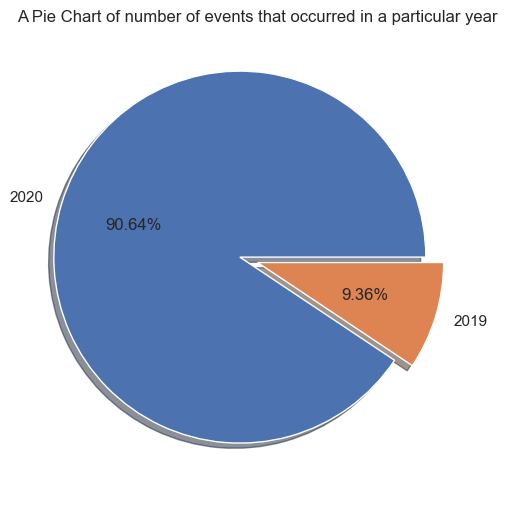

In [92]:
#Analysis number of event occurence by year
plt.figure(figsize=(6,8))
plt.pie(number_of_events['event_count'],labels=number_of_events['event_year'], explode= [0.1,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of number of events that occurred in a particular year")
plt.show()
#The pie chart shows there was a significant increase in subscriptions 
#in year 2020 when compared to year 2019

In [93]:
data['event_month'].value_counts()
#more events in April and the least occurence of event in November

April       946620
May         811680
March       569745
December    296113
January     267102
February    264952
June         78555
November      7309
Name: event_month, dtype: int64

Text(0.5, 1.0, 'monthly subscription')

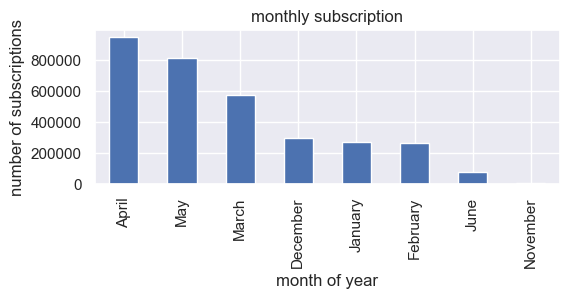

In [132]:
#Analysis the number of events by month visually
data['event_month'].value_counts().plot.bar(figsize =(6,2))
plt.ylabel('number of subscriptions')
plt.xlabel('month of year')
plt.title('monthly subscription')

#the Month of April has more subscription and November have the least number of subscriptions


In [95]:
#comparing total monthly subscriptions by year.
#More event occurence in 2020 compared to 2019
pd.crosstab(data['event_year'],data['event_month'], margins = True)

event_month   April  December  February  January   June   March     May  \
event_year                                                                
2019              0    296113         0        0      0       0       0   
2020         946620         0    264952   267102  78555  569745  811680   
All          946620    296113    264952   267102  78555  569745  811680   

event_month  November      All  
event_year                      
2019             7309   303422  
2020                0  2938654  
All              7309  3242076

In [96]:
#checking how events happen at different periods in a day
data['period_of_day'].value_counts()

Afternoon      839437
Morning        805110
Night          618664
Early hours    524316
Evening        454549
Name: period_of_day, dtype: int64

In [97]:
#checking how events happen at different periods in a day
p_of_day = data['period_of_day'].value_counts().to_frame().reset_index()
p_of_day.columns = ['period of day','event numbers']
p_of_day


period of day  event numbers
0     Afternoon         839437
1       Morning         805110
2         Night         618664
3   Early hours         524316
4       Evening         454549

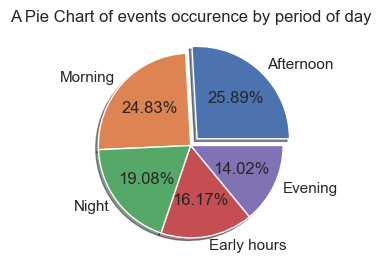

In [133]:
#plot a pie chart
plt.figure(figsize=(6,3))
plt.pie(p_of_day['event numbers'],labels=p_of_day['period of day'], explode= [0.1,0.0,0.0,0.0,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of events occurence by period of day")
plt.show()
#morning period has the highest number of events and evening has th least number of events

In [99]:
#checking event occurence by day of the week
data['event_day'].value_counts()

Monday       511433
Tuesday      506717
Wednesday    500201
Thursday     487364
Friday       458720
Sunday       415440
Saturday     362201
Name: event_day, dtype: int64

In [100]:
#checking event occurence by day of the week
day_of_the_week = data['event_day'].value_counts().to_frame()
day_of_the_week

event_day
Monday        511433
Tuesday       506717
Wednesday     500201
Thursday      487364
Friday        458720
Sunday        415440
Saturday      362201

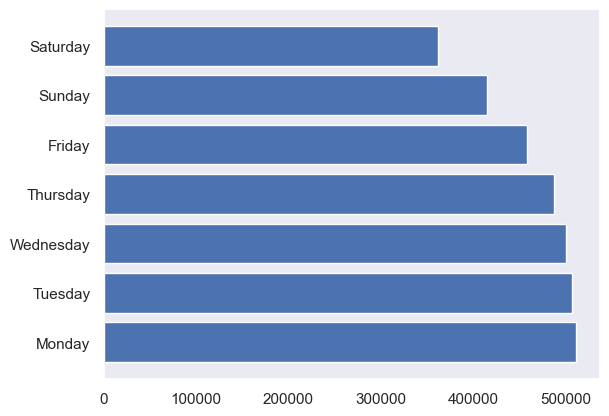

In [101]:
#visualizing event  by days of the week
x = day_of_the_week.index
y = day_of_the_week['event_day']
plt.barh(x,y)
plt.grid()
#more 

In [102]:
#comparing the occurence of event at a particular time of the day 
#in the different days of the week
#using period of day and event_day
day_period_data = pd.crosstab(data['period_of_day'],data['event_day'])

In [103]:
day_period_data

event_day      Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
period_of_day                                                                
Afternoon      118394  130949     91508  116625    121056   132542     128363
Early hours     73261   83076     59983   61334     83335    82121      81206
Evening         63716   71197     51559   60079     67434    70878      69686
Morning        120120  128252     85646   92710    123427   129177     125778
Night           83229   97959     73505   84692     92112    91999      95168

In [104]:
#checking the average monthly frequency of event occurence
monthly_frequency = data['event_month'].value_counts()/ len('event_month')
monthly_frequency

April       86056.363636
May         73789.090909
March       51795.000000
December    26919.363636
January     24282.000000
February    24086.545455
June         7141.363636
November      664.454545
Name: event_month, dtype: float64

In [105]:
#Checking the total number of events for each event occurence in the data set
number_of_events = data['event_type'].value_counts().to_frame().reset_index()
number_of_events.columns = ['event_type','counts']
number_of_events

event_type  counts
0                      ReadingOwnedBook  748260
1                   FirstLivebookAccess  658226
2                    FirstManningAccess  657340
3                       EBookDownloaded  277356
4                    ReadingFreePreview  138197
5                      HighlightCreated  121643
6                   FreeContentCheckout  116183
7                    ReadingOpenChapter  100004
8          ProductTocLivebookLinkOpened   88130
9                         LivebookLogin   62484
10          DashboardLivebookLinkOpened   48308
11                    WishlistItemAdded   37609
12             CrossReferenceTermOpened   34094
13                           SearchMade   27861
14                   SearchResultOpened   24228
15  ProductLookInsideLivebookLinkOpened   22987
16                      BookmarkCreated   10900
17                    EBookRegistration    8842
18                 LivebookRegistration    7702
19          LivebookAccountConfirmation    7309
20                       ExerciseSolved    6971
21  OrderConfirmationLivebookLinkOpened    6739
22                   AddProductOffering    6511
23                          NoteCreated    5181
24                          UpvoteGiven    4815
25              GoToManningShoppingCart    4608
26                 ShareableLinkCreated    2746
27                  ShareableLinkOpened    2387
28                RemoveProductOffering    2163
29                    AddOrUpdateCoupon    1277
30               ProductLiveaudioUpsell     838
31             ProductSeeFreeLinkOpened     163
32              SherlockHolmesClueFound      10
33      UnknownOriginLivebookLinkOpened       3
34                       CommentCreated       1

Text(0.5, 1.0, 'Boxplot')

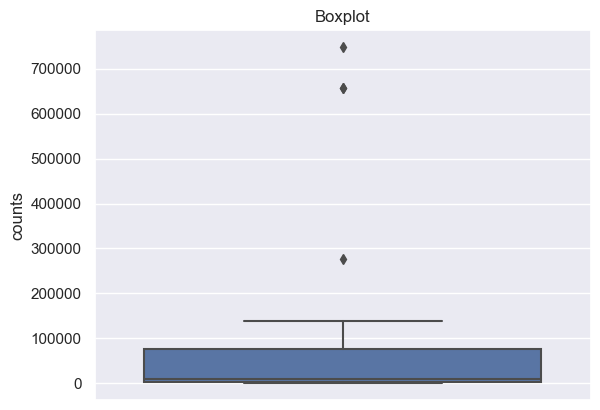

In [106]:
#Boxplot to examine outlier in the number of events
import seaborn as sns
sns.boxplot(y=number_of_events['counts'])
plt.title('Boxplot')

In [107]:
#To find the outliers in a variable, we need to find the distribution boundaries according to the IQR proximity rule.
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [108]:
#Calculate and then display the IQR proximity rule boundaries for the number of events  variable:
#Values below or above the upper and lower boundary by 1.5
upper_boundary, lower_boundary = find_boundaries(number_of_events, 'counts', 1.5)
upper_boundary, lower_boundary

(182752.0, -103768.0)

In [109]:
#finding the outliers in the data.
#Creating a boolean vector to flag observations outside the boundaries:
outliers = np.where(number_of_events['counts'] > upper_boundary, True,
            np.where(number_of_events['counts'] < lower_boundary, True, False))

In [110]:
outliers

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [111]:
#new dataframe with the outlier values displaying the top five rows:
outliers_df = number_of_events.loc[outliers, 'counts']
outliers_df.head(5)

0    748260
1    658226
2    657340
3    277356
Name: counts, dtype: int64

In [112]:
#remove the outliers from the number of events
number_of_events_trimmed = number_of_events.loc[~(outliers)]

In [113]:
#check for missing values in the record
#additional data variable has some missing values 
data.isnull().sum()

account_id                    0
event_time                    0
event_type                    0
product_id                    0
additional_data          516123
event_year                    0
event_month                   0
date_in_the_month             0
event_day                     0
event_hour                    0
event_time_of_the_day         0
period_of_day                 0
dtype: int64

In [114]:
#dropping additional_data column as it is not a needed metric in this project
data.drop('additional_data',axis=1)

account_id              event_time  \
0        608aa5969cef2edc29cb0c46deaec9da 2019-11-29 12:10:08.154   
1        d07263602248aa70ce1967d6f98f9506 2019-11-29 12:10:19.962   
2        b7d5902d66127909d0f9d766a841ebb5 2019-11-29 12:11:20.707   
3        d07263602248aa70ce1967d6f98f9506 2019-11-29 12:11:41.283   
4        89f7601cb558e1c47b00a7fabb6a466c 2019-11-29 12:11:58.253   
...                                   ...                     ...   
3242071  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.612   
3242075  3eff5d4b55889abb0a8b08d2136f1b63 2020-06-04 04:20:13.271   

                           event_type  product_id  event_year event_month  \
0         DashboardLivebookLinkOpened        1156        2019    November   
1                    ReadingOwnedBook         610        2019    November   
2                    ReadingOwnedBook        1172        2019    November   
3        ProductTocLivebookLinkOpened        1066        2019    November   
4                    ReadingOwnedBook        1073        2019    November   
...                               ...         ...         ...         ...   
3242071            FirstManningAccess          -1        2020        June   
3242072           FirstLivebookAccess          -1        2020        June   
3242073           FirstLivebookAccess          -1        2020        June   
3242074            FirstManningAccess          -1        2020        June   
3242075              ReadingOwnedBook         733        2020        June   

         date_in_the_month event_day  event_hour event_time_of_the_day  \
0                       29    Friday          12       12:10:08.154000   
1                       29    Friday          12       12:10:19.962000   
2                       29    Friday          12       12:11:20.707000   
3                       29    Friday          12       12:11:41.283000   
4                       29    Friday          12       12:11:58.253000   
...                    ...       ...         ...                   ...   
3242071                  4  Thursday           4       04:19:56.485000   
3242072                  4  Thursday           4       04:19:56.486000   
3242073                  4  Thursday           4       04:19:59.613000   
3242074                  4  Thursday           4       04:19:59.612000   
3242075                  4  Thursday           4       04:20:13.271000   

        period_of_day  
0           Afternoon  
1           Afternoon  
2           Afternoon  
3           Afternoon  
4           Afternoon  
...               ...  
3242071   Early hours  
3242072   Early hours  
3242073   Early hours  
3242074   Early hours  
3242075   Early hours  

[3242076 rows x 11 columns]

In [115]:
#checking for the total number of activies per account Id
data['account_id'].value_counts()


6bb61e3b7bce0931da574d19d1d82c88    1371593
86c876e217ae1ca1cd2986c5521a9768      17357
0c2a23a1ce63aa22296072df5cd065f7       5697
954c5420b7247345858b62c84d606bb7       5690
4de78691553567a9b9e20fde6667773b       4890
                                     ...   
8a831a7856dc0da98c6be48f705dcce8          1
155487ef76edc522f21a6fb177eaed78          1
bb7c0b0484f1908b7d85520a0429a826          1
b615e5a363163bc167b877cf34037568          1
3519f4939d54c1911afa74226a78c3f9          1
Name: account_id, Length: 89467, dtype: int64

In [116]:
#Analysis for account id 6bb61e3b7bce0931da574d19d1d82c88 on insight based on event occurence
account_data = data[data['account_id']=='6bb61e3b7bce0931da574d19d1d82c88']

In [117]:
account_data

account_id              event_time  \
11274    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:15:43.536   
11311    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:22:44.636   
11464    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:06.366   
11465    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:09.420   
11477    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:44:08.387   
...                                   ...                     ...   
3242068  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:27.445   
3242071  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.612   

                  event_type  product_id  \
11274    ShareableLinkOpened         975   
11311    ShareableLinkOpened        1094   
11464    ShareableLinkOpened         975   
11465    ShareableLinkOpened        1094   
11477    ShareableLinkOpened        1094   
...                      ...         ...   
3242068   FirstManningAccess          -1   
3242071   FirstManningAccess          -1   
3242072  FirstLivebookAccess          -1   
3242073  FirstLivebookAccess          -1   
3242074   FirstManningAccess          -1   

                                           additional_data  event_year  \
11274                                                 5371        2019   
11311                                                 5373        2019   
11464                                                 5371        2019   
11465                                                 5373        2019   
11477                                                 5373        2019   
...                                                    ...         ...   
3242068  https://www.manning.com/books/jquery-in-action...        2020   
3242071  https://www.manning.com/books/bdd-in-action-se...        2020   
3242072  https://www.manning.com/books/bdd-in-action-se...        2020   
3242073                            https://www.google.com/        2020   
3242074                            https://www.google.com/        2020   

        event_month  date_in_the_month event_day  event_hour  \
11274      December                  1    Sunday          17   
11311      December                  1    Sunday          17   
11464      December                  1    Sunday          17   
11465      December                  1    Sunday          17   
11477      December                  1    Sunday          17   
...             ...                ...       ...         ...   
3242068        June                  4  Thursday           4   
3242071        June                  4  Thursday           4   
3242072        June                  4  Thursday           4   
3242073        June                  4  Thursday           4   
3242074        June                  4  Thursday           4   

        event_time_of_the_day period_of_day  
11274         17:15:43.536000       Evening  
11311         17:22:44.636000       Evening  
11464         17:42:06.366000       Evening  
11465         17:42:09.420000       Evening  
11477         17:44:08.387000       Evening  
...                       ...           ...  
3242068       04:19:27.445000   Early hours  
3242071       04:19:56.485000   Early hours  
3242072       04:19:56.486000   Early hours  
3242073       04:19:59.613000   Early hours  
3242074       04:19:59.612000   Early hours  

[1371593 rows x 12 columns]

In [118]:
account_data['event_type'].value_counts()
#shows events types carry out by account_id 6bb61e3b7bce0931da574d19d1d82c88
#this account id carries out the following events as shown below

FirstLivebookAccess    658226
FirstManningAccess     657340
FreeContentCheckout     55772
ShareableLinkOpened       231
SearchResultOpened         24
Name: event_type, dtype: int64

In [119]:
#comparing the occurence of event at a particular time of the day 
#using period of day and event_types
#carry out by account_id 6bb61e3b7bce0931da574d19d1d82c88

account_data_day_period = pd.crosstab(account_data['period_of_day'],account_data['event_type'])
account_data_day_period

event_type     FirstLivebookAccess  FirstManningAccess  FreeContentCheckout  \
period_of_day                                                                 
Afternoon                   180237              180008                15425   
Early hours                  96495               96217                 9696   
Evening                      90428               90215                 8390   
Morning                     180122              180186                11114   
Night                       110944              110714                11147   

event_type     SearchResultOpened  ShareableLinkOpened  
period_of_day                                           
Afternoon                       4                   68  
Early hours                     5                   19  
Evening                         3                   42  
Morning                         7                   50  
Night                           5                   52

In [120]:
# To analyse the total numbers of events carried out in a particular period of day for account_data (account_id 6bb61e3b7bce0931da574d19d1d82c88)

account_data_period_of_day= account_data['period_of_day'].value_counts().to_frame().reset_index()
account_data_period_of_day.columns = ['period of day','event numbers']
account_data_period_of_day

period of day  event numbers
0     Afternoon         375742
1       Morning         371479
2         Night         232862
3   Early hours         202432
4       Evening         189078

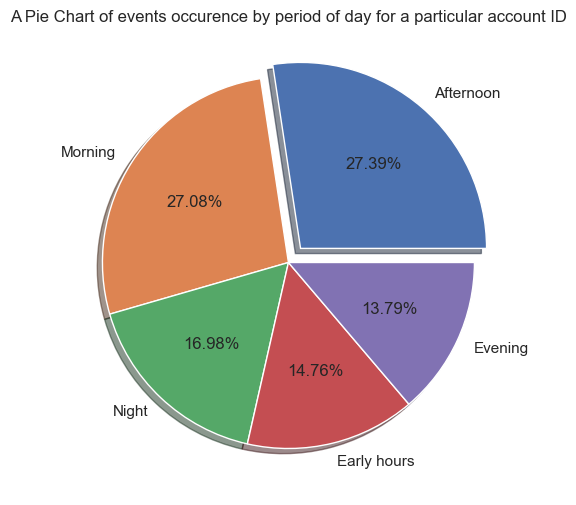

In [121]:
#plot a pie chart
plt.figure(figsize=(6,8))
plt.pie(account_data_period_of_day['event numbers'],labels=account_data_period_of_day['period of day'], explode= [0.1,0.0,0.0,0.0,0.0], autopct='%1.2f%%', shadow= True)
plt.title("A Pie Chart of events occurence by period of day for a particular account ID")
plt.show()
#Afternoon period has the highest number of events and evening has the least number of events

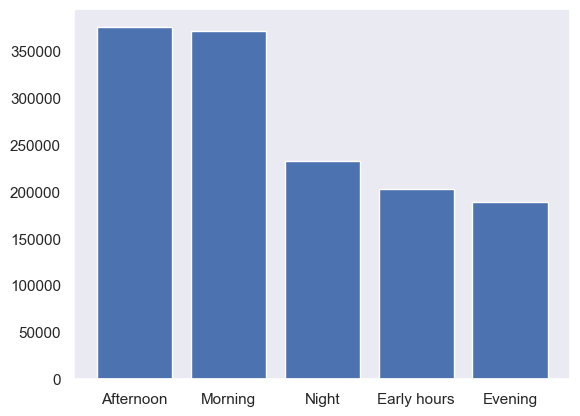

In [122]:
#visualizing the sum total of events by period of day for account_id 6bb61e3b7bce0931da574d19d1d82c88

x = account_data_period_of_day['period of day']
y = account_data_period_of_day['event numbers']
plt.bar(x,y)
plt.grid()
 



In [123]:
#checking missing value for the account data account_id 6bb61e3b7bce0931da574d19d1d82c88
account_data.isnull().sum()

account_id                   0
event_time                   0
event_type                   0
product_id                   0
additional_data          55772
event_year                   0
event_month                  0
date_in_the_month            0
event_day                    0
event_hour                   0
event_time_of_the_day        0
period_of_day                0
dtype: int64

In [124]:
#dropping additional_data column as it is not a needed metric in this project
#for the account data account_id 6bb61e3b7bce0931da574d19d1d82c88
account_data.drop('additional_data',axis=1)

account_id              event_time  \
11274    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:15:43.536   
11311    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:22:44.636   
11464    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:06.366   
11465    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:42:09.420   
11477    6bb61e3b7bce0931da574d19d1d82c88 2019-12-01 17:44:08.387   
...                                   ...                     ...   
3242068  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:27.445   
3242071  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.485   
3242072  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:56.486   
3242073  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.613   
3242074  6bb61e3b7bce0931da574d19d1d82c88 2020-06-04 04:19:59.612   

                  event_type  product_id  event_year event_month  \
11274    ShareableLinkOpened         975        2019    December   
11311    ShareableLinkOpened        1094        2019    December   
11464    ShareableLinkOpened         975        2019    December   
11465    ShareableLinkOpened        1094        2019    December   
11477    ShareableLinkOpened        1094        2019    December   
...                      ...         ...         ...         ...   
3242068   FirstManningAccess          -1        2020        June   
3242071   FirstManningAccess          -1        2020        June   
3242072  FirstLivebookAccess          -1        2020        June   
3242073  FirstLivebookAccess          -1        2020        June   
3242074   FirstManningAccess          -1        2020        June   

         date_in_the_month event_day  event_hour event_time_of_the_day  \
11274                    1    Sunday          17       17:15:43.536000   
11311                    1    Sunday          17       17:22:44.636000   
11464                    1    Sunday          17       17:42:06.366000   
11465                    1    Sunday          17       17:42:09.420000   
11477                    1    Sunday          17       17:44:08.387000   
...                    ...       ...         ...                   ...   
3242068                  4  Thursday           4       04:19:27.445000   
3242071                  4  Thursday           4       04:19:56.485000   
3242072                  4  Thursday           4       04:19:56.486000   
3242073                  4  Thursday           4       04:19:59.613000   
3242074                  4  Thursday           4       04:19:59.612000   

        period_of_day  
11274         Evening  
11311         Evening  
11464         Evening  
11465         Evening  
11477         Evening  
...               ...  
3242068   Early hours  
3242071   Early hours  
3242072   Early hours  
3242073   Early hours  
3242074   Early hours  

[1371593 rows x 11 columns]

In [125]:
#viewing the type of events carried out  for the account data account_id 6bb61e3b7bce0931da574d19d1d82c88
account_data['event_type'].unique()


array(['ShareableLinkOpened', 'SearchResultOpened', 'FreeContentCheckout',
       'FirstManningAccess', 'FirstLivebookAccess'], dtype=object)

In [126]:
#Getting the total count of each event type on the account data account_id 6bb61e3b7bce0931da574d19d1d82c88
account_data['event_type'].value_counts()

FirstLivebookAccess    658226
FirstManningAccess     657340
FreeContentCheckout     55772
ShareableLinkOpened       231
SearchResultOpened         24
Name: event_type, dtype: int64

In [127]:
#Checking the average frequency of the event occurence for the account data account_id 6bb61e3b7bce0931da574d19d1d82c88
label_freq = account_data['event_type'].value_counts() / len(account_data)
label_freq

FirstLivebookAccess    0.479899
FirstManningAccess     0.479253
FreeContentCheckout    0.040662
ShareableLinkOpened    0.000168
SearchResultOpened     0.000017
Name: event_type, dtype: float64

Text(0.5, 1.0, 'Identifying less frequent event types for account_id 6bb61e3b7bce0931da574d19d1d82c88')

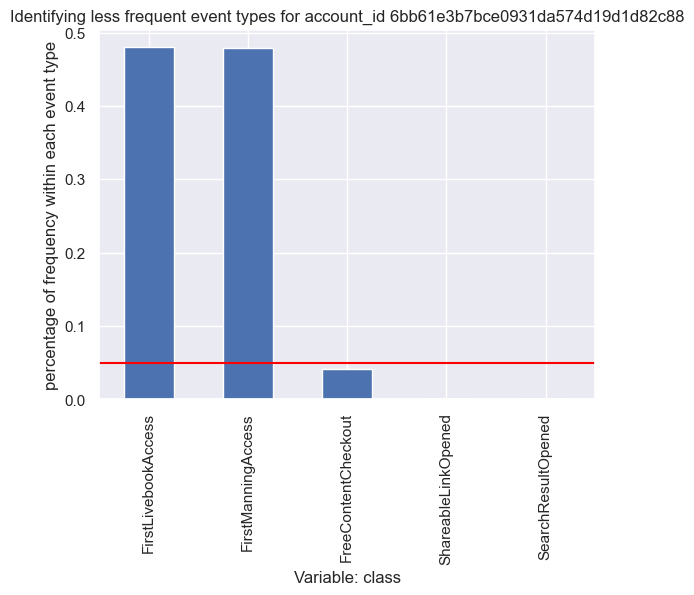

In [128]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05, color='red')
fig.set_ylabel('percentage of frequency within each event type')
fig.set_xlabel('Variable: class')
fig.set_title('Identifying less frequent event types for account_id 6bb61e3b7bce0931da574d19d1d82c88')